__Yasamin Panahi - 97100687__

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import warnings
import matplotlib.pyplot as plt
import random as random

I wrote a LogisticRegression Classifier with 3 loss functions (logloss,mse,mae) and 2 optimization methods(GD and GD with mini batches).
Then i used a dataset from sklearn.datasets for binary classification and split it to train and test part (20% being test data) to test my classifier with test data after that i checked accuracy score. there is also a plot visulizinng the classification.

After writing this LogisticRegression Classifier, i decided to write a simple KNNClassifier just to see how it works! :)

__LogisticRegression Classifier:__

In [2]:
class LogisticRegression_Classifier:
    def __init__(self, eta, num_iter, batch_size, epoch):
        self.eta = eta  #learning rate
        self.num_iter = num_iter #number of itterations
        self.batch_size = batch_size  #batch size
        self.epoch = epoch #n_epoch

    def add_intercept(self, x):
        intercept = np.ones((x.shape[0], 1))  
        return np.concatenate((intercept, x), axis=1)  

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, x, y, op, ls):
        
        '''ls is determining Loss function:
        ls = 1 is cross entropy(logloss) for binary classification
        ls = 0 is mse (mean squared error)
        ls = 2 is mae (mean absolute error)
        '''
        '''op is determining Optimization method:
        op = 1 is Simple GD Optimizer
        op = 0 is GD Optimizer with mini_batches'''
        
        x = self.add_intercept(x) 
        n_s = len(y) #number of samples
        self.weights = np.zeros(x.shape[1]) #weights in z = x.w+b
        self.op = op
        self.b = 0
        
        ''' z = w.x + b
        a = sigmoid(z)
        gradient = d(Loss)/d(weights)
        '''
        if self.op == 1: #Simple GD Optimizer
            if ls == 1:  #Cross entropy
                for i in range(self.num_iter): 
                    z = np.dot(x, self.weights) + self.b
                    a = self.sigmoid(z)
                    gradient = np.dot(x.T, (a - y)) / n_s 
                    db = np.sum(a - y) / n_s
                    self.weights -= self.eta * gradient
                    self.b -= self.eta * db
            if ls == 0: #MSE loss
                for i in range(self.num_iter): 
                    z = np.dot(x, self.weights) + self.b
                    a = self.sigmoid(z)
                    gradient = np.dot(x.T,2*a*(1 - a)*(a - y)) / n_s  
                    db = np.sum(2*a*(1 - a)*(a - y)) / n_s
                    self.weights -= self.eta * gradient
                    self.b -= self.eta * db
            if ls == 2: #MAE loss
                for i in range(self.num_iter): 
                    z = np.dot(x, self.weights) + self.b
                    a = self.sigmoid(z)
                    gradient = np.dot(x.T,a*(1 - a)) / n_s  
                    db = np.sum(a*(1 - a)) / n_s
                    self.weights -= self.eta * gradient
                    self.b -= self.eta * db
                
        if self.op == 0: #GD with mini batches Optimizer
            if ls == 1:  #Cross entropy loss
                for i in range(self.epoch): 
                    for batch_ind in range(0, int(n_s/self.batch_size) ):
                        x_batch = x[batch_ind*self.batch_size: min(n_s, (batch_ind+1)*self.batch_size ) ]
                        y_batch = y[batch_ind*self.batch_size: min(n_s, (batch_ind+1)*self.batch_size ) ]
                        z = np.dot(x_batch, self.weights) + self.b
                        a = self.sigmoid(z)
                        gradient = np.dot(x_batch.T, (a - y_batch)) / self.batch_size
                        db = np.sum(a - y_batch) / self.batch_size
                        self.weights -= self.eta * gradient
                        self.b -= self.eta * db
            if ls == 0: #MSE loss
                for i in range(self.epoch): 
                    for batch_ind in range(0, int(n_s/self.batch_size) ):
                        x_batch = x[batch_ind*self.batch_size: min(n_s, (batch_ind+1)*self.batch_size ) ]
                        y_batch = y[batch_ind*self.batch_size: min(n_s, (batch_ind+1)*self.batch_size ) ]
                        z = np.dot(x_batch, self.weights) + self.b
                        a = self.sigmoid(z)
                        gradient = np.dot(x_batch.T,2*a*(1 - a)*(a - y_batch)) / self.batch_size
                        db = np.sum(2*a*(1 - a)*(a - y_batch)) / self.batch_size
                        self.weights -= self.eta * gradient
                        self.b -= self.eta * db
            if ls == 2: #MAE loss
                for i in range(self.epoch): 
                    for batch_ind in range(0, int(n_s/self.batch_size) ):
                        x_batch = x[batch_ind*self.batch_size: min(n_s, (batch_ind+1)*self.batch_size ) ]
                        y_batch = y[batch_ind*self.batch_size: min(n_s, (batch_ind+1)*self.batch_size ) ]
                        z = np.dot(x_batch, self.weights) + self.b
                        a = self.sigmoid(z)
                        gradient = np.dot(x_batch.T,a*(1 - a)) / self.batch_size
                        db = np.sum(a*(1 - a)) / self.batch_size
                        self.weights -= self.eta * gradient
                        self.b -= self.eta * db
            
    def predict_prob(self, x):
        x = self.add_intercept(x)
        return self.sigmoid(np.dot(x, self.weights) + self.b)
    
    def predict(self,x):
        return self.predict_prob(x_test).round()

In [3]:
warnings.filterwarnings( "ignore" )

data = load_breast_cancer() #binary classification dataset
x = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)  #split the dataset

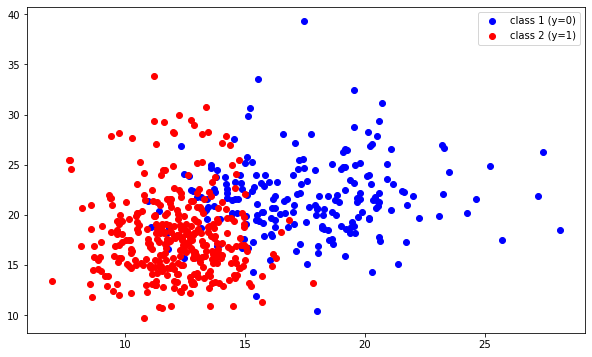

In [4]:
#ALL Data Plot
plt.figure(figsize=(10, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='b', label='class 1 (y=0)') 
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='r', label='class 2 (y=1)')
plt.legend()

In [5]:
#calling the classifier
#differnt arguments for different optimizations
LRclassifier = LogisticRegression_Classifier(eta=0.5, num_iter=200000, batch_size = 10, epoch = 5)

Accuracy for GD Optimizer with Cross Entropy loss function is: 0.9649122807017544


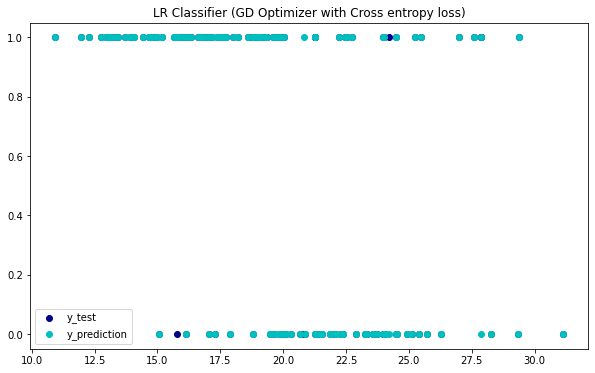

In [6]:
#GD Optimizer with Cross entropy loss
LRclassifier.fit(x_train, y_train,1,1) #op = 1
y_pred= LRclassifier.predict(x_test)
score_GDCE = accuracy_score(y_test, y_pred)
print(f"Accuracy for GD Optimizer with Cross Entropy loss function is: {score_GDCE}")
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:,1], y_test , color='darkblue', label='y_test')
plt.scatter(x_test[:,1], y_pred , color='c', label='y_prediction')
plt.title('LR Classifier (GD Optimizer with Cross entropy loss)')
plt.legend()

Accuracy for GD with mini batches Optimizer with Cross Entropy loss function is: 0.9385964912280702


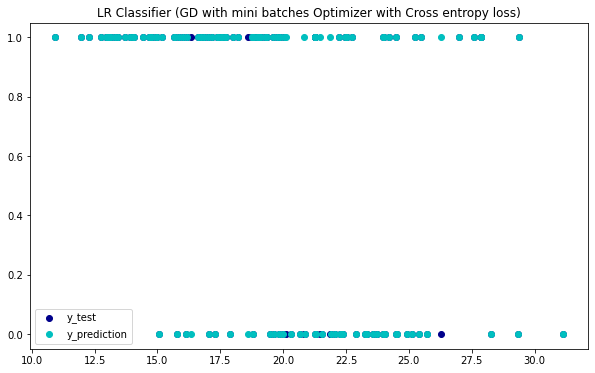

In [7]:
#GD with mini batches with Cross Entropy loss
LRclassifier.fit(x_train, y_train,0,1) #op = 0
y_pred= LRclassifier.predict(x_test)
score_GDMBCE = accuracy_score(y_test, y_pred)
print(f"Accuracy for GD with mini batches Optimizer with Cross Entropy loss function is: {score_GDMBCE}")
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:,1], y_test , color='darkblue', label='y_test')
plt.scatter(x_test[:,1], y_pred , color='c', label='y_prediction')
plt.title('LR Classifier (GD with mini batches Optimizer with Cross entropy loss)')
plt.legend()

As we can see, the Accuracy metric is very good when we use cross entropy (logloss) loss function, with both GD and GD with mini batches optimizer. so we can conclude that logloss is a proper loss function for logistic regression classifier.

Accuracy for GD with mini batches Optimizer with MSE loss function is: 0.37719298245614036


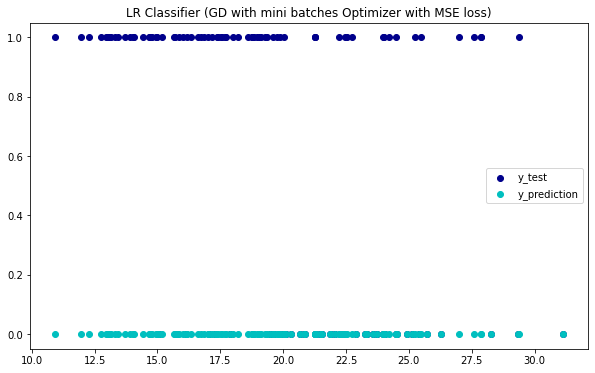

In [10]:
#GD with mini batches with MSE
LRclassifier.fit(x_train, y_train,0,0) 
y_pred= LRclassifier.predict(x_test)
score_GDMBMSE = accuracy_score(y_test, y_pred)
print(f"Accuracy for GD with mini batches Optimizer with MSE loss function is: {score_GDMBMSE}")
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:,1], y_test , color='darkblue', label='y_test')
plt.scatter(x_test[:,1], y_pred , color='c', label='y_prediction')
plt.title('LR Classifier (GD with mini batches Optimizer with MSE loss)')
plt.legend()

We can clearly see that mse is not a very badd loss function! seems like there is no classification here.

Accuracy for GD Optimizer with MSE loss function is: 0.37719298245614036


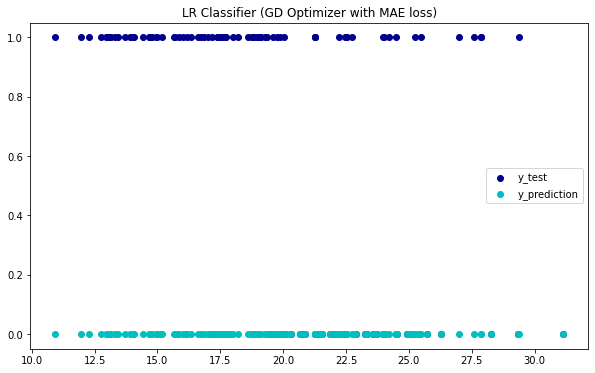

In [12]:
#Simple GD Optimizer with MAE
LRclassifier.fit(x_train, y_train,1,2) #op = 1
y_pred= LRclassifier.predict(x_test)
score_GDMAE = accuracy_score(y_test, y_pred)
print(f"Accuracy for GD Optimizer with MSE loss function is: {score_GDMSE}")
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:,1], y_test , color='darkblue', label='y_test')
plt.scatter(x_test[:,1], y_pred , color='c', label='y_prediction')
plt.title('LR Classifier (GD Optimizer with MAE loss)')
plt.legend()

Accuracy for GD with mini batches Optimizer with MAE loss function is: 0.37719298245614036


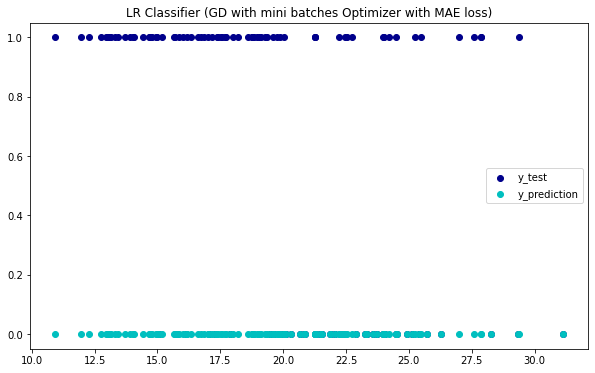

In [13]:
#GD with mini batches with MAE loss
LRclassifier.fit(x_train, y_train,0,2) 
y_pred= LRclassifier.predict(x_test)
score_GDMBMAE = accuracy_score(y_test, y_pred)
print(f"Accuracy for GD with mini batches Optimizer with MAE loss function is: {score_GDMBMAE}")
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:,1], y_test , color='darkblue', label='y_test')
plt.scatter(x_test[:,1], y_pred , color='c', label='y_prediction')
plt.title('LR Classifier (GD with mini batches Optimizer with MAE loss)')
plt.legend()

We can clearly see that mae is also a terrible loss function!!

The other classifier that i wrote

__KNN Classifier:__

In [14]:
from scipy.spatial import distance
def euc(a,b): #for distance of neighbours
    return distance.euclidean(a,b)

In [46]:
class KNNClassifier():
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self,row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        for i in range(1,len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        return self.Y_train[best_index]

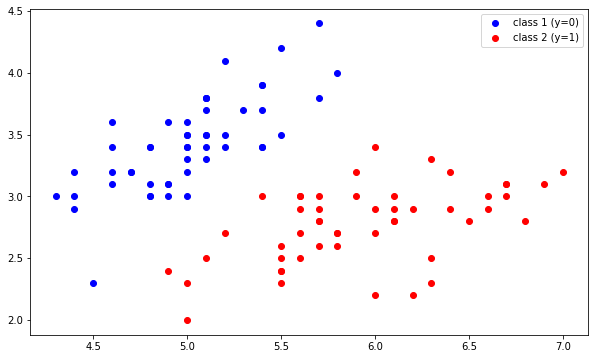

In [47]:
from sklearn import datasets
Data = datasets.load_iris()
X = Data.data
Y = Data.target
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.5)
#ALL Data Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='b', label='class 1 (y=0)') 
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='r', label='class 2 (y=1)')
plt.legend()

Accuracy Score for KNNClassifier is: 0.9368421052631579


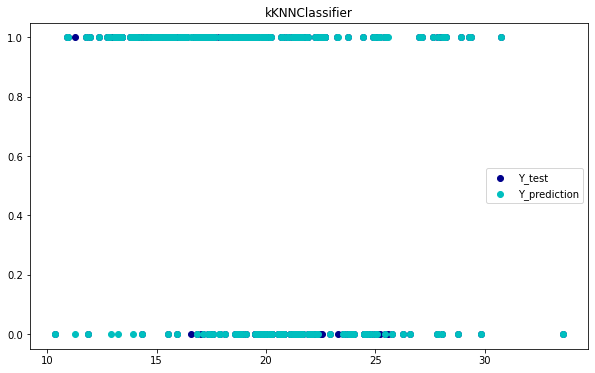

In [53]:
knn_classifier = KNNClassifier()
knn_classifier .fit(X_train,Y_train)
Y_pred = knn_classifier.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:,1], Y_test , color='darkblue', label='Y_test')
plt.scatter(X_test[:,1], Y_pred , color='c', label='Y_prediction')
plt.legend()
plt.title('kKNNClassifier')
print(f"Accuracy Score for KNNClassifier is: {accuracy_score(Y_test,Y_pred)}")

The accuracy is quite good! :)